In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Visualizing
%matplotlib inline

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# Wrangling
import pandas as pd
import numpy as np
import os
import env

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

#import acquire
#import summarize
#import prepare

In [2]:
import pandas as pd
import numpy as np
import os
import env
import wrangle 
from env import host, user, password

In [3]:
df = wrangle.get_mall_customer_data()

In [4]:
df

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40
...,...,...,...,...,...,...
195,195,196,Female,35,120,79
196,196,197,Female,45,126,28
197,197,198,Male,32,126,74
198,198,199,Male,32,137,18


In [7]:
# Handle missing values in the DataFrame
df = df.drop("Unnamed: 0", axis=1)


Column: customer_id


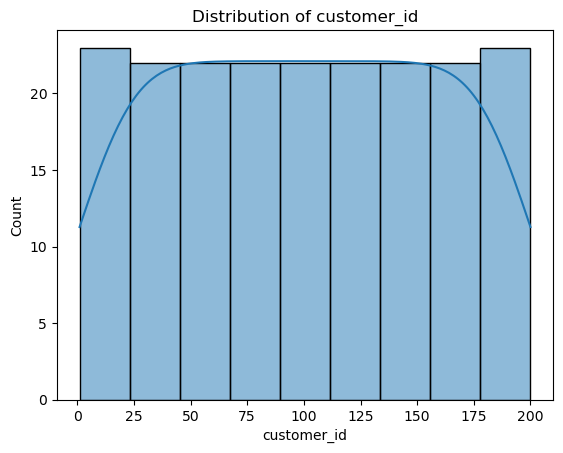


Column: gender

Column: age


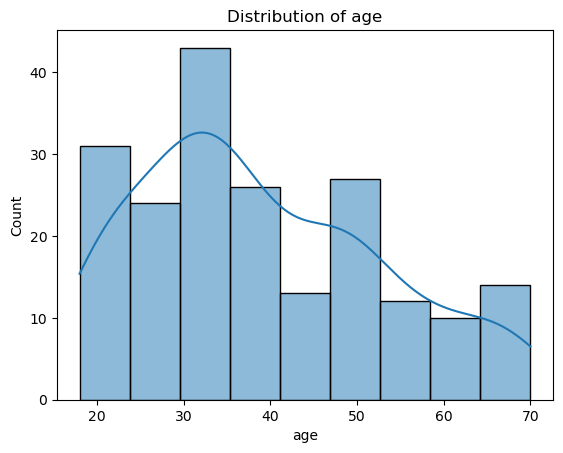


Column: annual_income


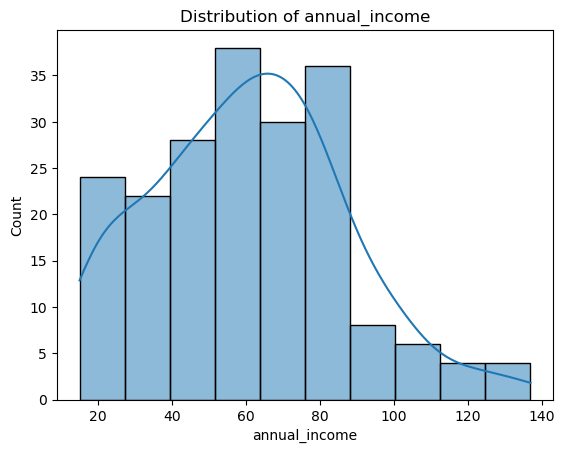


Column: spending_score


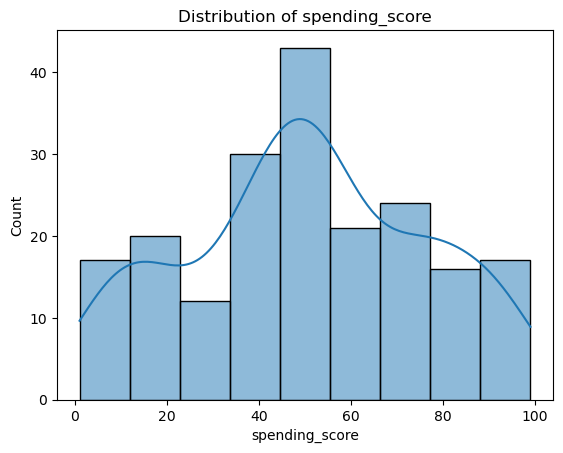

,num_rows_missing,pct_rows_missing,count,count_nulls,pct_nulls,mean,std,min,25%,50%,75%,max,unique,top,freq,dtype,distribution_type,skewness,skew_type,data_type,num_outliers,variable_type
customer_id,0.000000,0.000000,200.000000,0,0.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000,nan,nan,nan,int64,non-normal,0.000000,Symmetric,Continuous,0.000000,numerical
gender,0,0.000000,200,0,0.000000,nan,nan,nan,nan,nan,nan,nan,2,Female,112,object,None,nan,None,None,nan,nominal
age,0.000000,0.000000,200.000000,0,0.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000,nan,nan,nan,int64,non-normal,0.481919,Right,Continuous,0.000000,numerical
annual_income,0.000000,0.000000,200.000000,0,0.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000,nan,nan,nan,int64,normal,0.319424,Right,Continuous,2.000000,numerical
spending_score,0.000000,0.000000,200.000000,0,0.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000,nan,nan,nan,int64,non-normal,-0.046865,Left,Continuous,0.000000,numerical


In [8]:
wrangle.custom_describe(df)

In [20]:
df = wrangle.encode_binary_columns(df, 'sex', encoding_method='ordinal')

KeyError: 's'

In [21]:
# Load the example dataset
df = sns.load_dataset('tips')

In [22]:
# Compute the correlation matrix for numerical features
corr_matrix = df.corr()

In [24]:
corr_matrix

,total_bill,tip,size
total_bill,1.00,0.68,0.60
tip,0.68,1.00,0.49
size,0.60,0.49,1.00


In [26]:
wrangle.custom_describe(df)

TypeError: Cannot interpret 'CategoricalDtype(categories=['Male', 'Female'], ordered=False)' as a data type

In [13]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
def recommend_chart_type(corr_coeff):
    if abs(corr_coeff) >= 0.7:
        return "Scatterplot (strong correlation)"
    elif abs(corr_coeff) >= 0.3:
        return "Scatterplot (moderate correlation)"
    else:
        return "Barplot (weak or no correlation)"

In [ ]:
chart_recommendations = {}

for i, feature1 in enumerate(corr_matrix.columns):
    for j, feature2 in enumerate(corr_matrix.columns):
        if i < j:
            corr_coeff = corr_matrix.loc[feature1, feature2]
            chart_type = recommend_chart_type(corr_coeff)
            chart_recommendations[(feature1, feature2)] = chart_type

In [ ]:
grid_size = int(np.ceil(np.sqrt(len(chart_recommendations))))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

for index, ((feature1, feature2), chart_type) in enumerate(chart_recommendations.items()):
    row, col = divmod(index, grid_size)
    ax = axes[row, col]

    if chart_type == "Scatterplot (strong correlation)" or chart_type == "Scatterplot (moderate correlation)":
        sns.scatterplot(data=df, x=feature1, y=feature2, ax=ax)
    elif chart_type == "Barplot (weak or no correlation)":
        sns.barplot(data=df, x=feature1, y=feature2, ax=ax)

    ax.set_title(f"{feature1} vs {feature2}\n{chart_type}")

# Remove empty subplots
for i in range(index + 1, grid_size * grid_size):
    row, col = divmod(i, grid_size)
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()